In [52]:
from Bio import SeqIO
import os
import re

target_uniprots = ["P37840", "P04637", "P02686", "P07305", "O00488", "Q9NYB9", "P06401", "Q16186", "S6B291", "P23441"]


In [ ]:
## Load all cluster representatives

counter = 0
sequences = []
fastafile = "/data/franco/datasets/disprot/disprot_regions_seq_cdhit0.9"
for record in SeqIO.parse(fastafile, "fasta"):
    sequences.append(record)
    counter += 1
    
target_dict = dict()    
for t in target_uniprots:
    target_dict[t] = list()
    
for s in sequences:
    for t in target_uniprots:
        if s.name.startswith(t):
            target_dict[t].append(s)

In [ ]:
# If more than one representative per protein (different regions in different clusters?), choose the longest

if not os.path.exists("target_uniprots"):
    os.makedirs("target_uniprots")
for t in target_uniprots:
    print(t)
    if len(target_dict[t]) == 1:
        with open(f"target_uniprots/{t}_region.fasta", 'w') as outf:
            outf.write(f">{target_dict[t][0].name}\n{target_dict[t][0].seq}\n")
    else:
        longest = 0
        for i, e in enumerate(target_dict[t]):
            #print(len(e.seq))
            if len(e.seq) > len(target_dict[t][longest]):
                longest = i
        #print(longest)
        with open(f"target_uniprots/{t}_region.fasta", 'w') as outf:
            outf.write(f">{target_dict[t][longest].name}\n{target_dict[t][longest].seq}\n")

In [ ]:
# do alignments for disordered regions 

for t in target_uniprots:
    input_fasta = f"target_uniprots/{t}_region.fasta"
    out_report  = f"target_uniprots/{t}_region.out"
    out_msa  = f"target_uniprots/{t}_region.a3m"
    print(f"hhblits -i {input_fasta} -o {out_report} -oa3m {out_msa} -d /data/franco/datasets/bfd/bfd_metaclust_clu_complete_id30_c90_final_seq.sorted_opt;")

In [2]:
# do alignments for full protein sequences

for t in target_uniprots:
    input_fasta = f"/data/franco/datasets/disprot/fasta/{t}.fasta"
    out_report  = f"target_uniprots/{t}_full.out"
    out_msa  = f"target_uniprots/{t}_full.a3m"
    print(f"hhblits -i {input_fasta} -o {out_report} -oa3m {out_msa} -d /data/franco/datasets/bfd/bfd_metaclust_clu_complete_id30_c90_final_seq.sorted_opt;")


hhblits -i /data/franco/datasets/disprot/fasta/P37840.fasta -o target_uniprots/P37840_full.out -oa3m target_uniprots/P37840_full.a3m -d /data/franco/datasets/bfd/bfd_metaclust_clu_complete_id30_c90_final_seq.sorted_opt;
hhblits -i /data/franco/datasets/disprot/fasta/P04637.fasta -o target_uniprots/P04637_full.out -oa3m target_uniprots/P04637_full.a3m -d /data/franco/datasets/bfd/bfd_metaclust_clu_complete_id30_c90_final_seq.sorted_opt;
hhblits -i /data/franco/datasets/disprot/fasta/P02686.fasta -o target_uniprots/P02686_full.out -oa3m target_uniprots/P02686_full.a3m -d /data/franco/datasets/bfd/bfd_metaclust_clu_complete_id30_c90_final_seq.sorted_opt;
hhblits -i /data/franco/datasets/disprot/fasta/P07305.fasta -o target_uniprots/P07305_full.out -oa3m target_uniprots/P07305_full.a3m -d /data/franco/datasets/bfd/bfd_metaclust_clu_complete_id30_c90_final_seq.sorted_opt;
hhblits -i /data/franco/datasets/disprot/fasta/O00488.fasta -o target_uniprots/O00488_full.out -oa3m target_uniprots/O00

In [54]:
## Reformat a3m MSAs into fastas
## https://www.biostars.org/p/9470377/
import os
for t in target_uniprots:
    msafile = f"target_uniprots/msa_full/{t}_full.a3m"
    newmsafile = f"target_uniprots/msa_full/{t}_full.msa.fasta"
    os.system(f"./reformat.pl a3m fas {msafile} {newmsafile}")
 

inserting gaps...
Reformatted target_uniprots/msa_full/P37840_full.a3m with 92 sequences from a3m to fas and written to file target_uniprots/msa_full/P37840_full.msa.fasta
inserting gaps...
Reformatted target_uniprots/msa_full/P04637_full.a3m with 988 sequences from a3m to fas and written to file target_uniprots/msa_full/P04637_full.msa.fasta
inserting gaps...
Reformatted target_uniprots/msa_full/P02686_full.a3m with 82 sequences from a3m to fas and written to file target_uniprots/msa_full/P02686_full.msa.fasta
inserting gaps...
Reformatted target_uniprots/msa_full/P07305_full.a3m with 2060 sequences from a3m to fas and written to file target_uniprots/msa_full/P07305_full.msa.fasta
inserting gaps...
Reformatted target_uniprots/msa_full/O00488_full.a3m with 1177 sequences from a3m to fas and written to file target_uniprots/msa_full/O00488_full.msa.fasta
inserting gaps...
Reformatted target_uniprots/msa_full/Q9NYB9_full.a3m with 1993 sequences from a3m to fas and written to file target_u

In [55]:
from prody import *
MSAs = list()
for t in target_uniprots:
    newmsafile = f"target_uniprots/msa_full/{t}_full.msa.fasta"
    mymsa = parseMSA(newmsafile)
    MSAs.append(mymsa)
    
MSAs_region = list()
for t in target_uniprots:
    newmsafile = f"target_uniprots/msa_region/{t}_region.msa.fasta"
    mymsa = parseMSA(newmsafile)
    MSAs_region.append(mymsa)

@> 92 sequence(s) with 320 residues were parsed in 0.04s.
@> 988 sequence(s) with 2165 residues were parsed in 0.18s.
@> 82 sequence(s) with 577 residues were parsed in 0.00s.
@> 2060 sequence(s) with 2750 residues were parsed in 0.05s.
@> 1177 sequence(s) with 973 residues were parsed in 0.01s.
@> 1993 sequence(s) with 4074 residues were parsed in 0.05s.
@> 2579 sequence(s) with 10490 residues were parsed in 0.09s.
@> 1977 sequence(s) with 4708 residues were parsed in 0.03s.
@> 2461 sequence(s) with 7827 residues were parsed in 0.07s.
@> 2470 sequence(s) with 4225 residues were parsed in 0.03s.
@> 92 sequence(s) with 320 residues were parsed in 0.00s.
@> 43 sequence(s) with 195 residues were parsed in 0.00s.
@> 57 sequence(s) with 363 residues were parsed in 0.00s.
@> 33 sequence(s) with 99 residues were parsed in 0.00s.
@> 1096 sequence(s) with 178 residues were parsed in 0.00s.
@> 1653 sequence(s) with 3035 residues were parsed in 0.02s.
@> 42 sequence(s) with 731 residues were pars

In [63]:
MSA_labels = list()
for m in MSAs:
    MSA_labels.append(m[0].getLabel())
    
MSA_region_labels = list()
for m in MSAs_region:
    MSA_region_labels.append(m[0].getLabel())

In [116]:
aa = "abcdef"
bb = "cde"
m = re.search(bb, aa)
print(m.start())

2


@> Label refinement reduced number of columns from 320 to 140 in 0.00s.


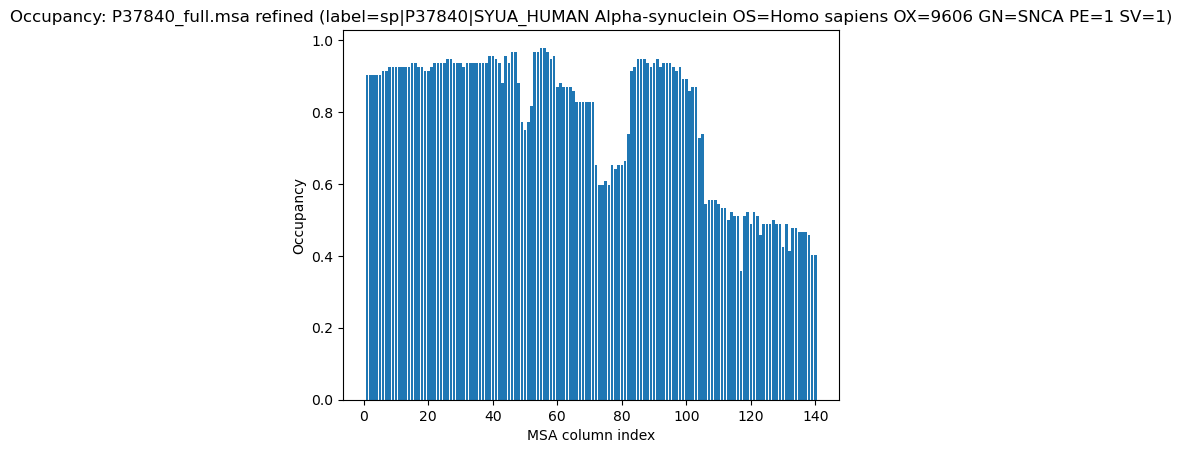

@> Cannot parse start and end values from sequence label sp|P37840|SYUA_HUMAN Alpha-synuclein OS=Homo sapiens OX=9606 GN=SNCA PE=1 SV=1. Setting resnums 1 to 140
@> Cannot parse start and end values from sequence label tr|A0A212CLG3|A0A212CLG3_CEREH Alpha-synuclein OS=Cervus elaphus hippelaphus GN=Celaphus_00018621 PE=3 SV=1. Setting resnums 1 to 140
@> Cannot parse start and end values from sequence label tr|A0A1D5P8R1|A0A1D5P8R1_CHICK Alpha-synuclein OS=Gallus gallus GN=SNCA PE=3 SV=1. Setting resnums 1 to 140
@> Cannot parse start and end values from sequence label tr|K7FW98|K7FW98_PELSI Alpha-synuclein OS=Pelodiscus sinensis GN=SNCA PE=3 SV=1. Setting resnums 1 to 140
@> Cannot parse start and end values from sequence label tr|B5G015|B5G015_TAEGU Alpha-synuclein OS=Taeniopygia guttata PE=2 SV=1. Setting resnums 1 to 140
@> Cannot parse start and end values from sequence label tr|G3HIY8|G3HIY8_CRIGR Alpha-synuclein OS=Cricetulus griseus GN=I79_010620 PE=3 SV=1. Setting resnums 1 to 

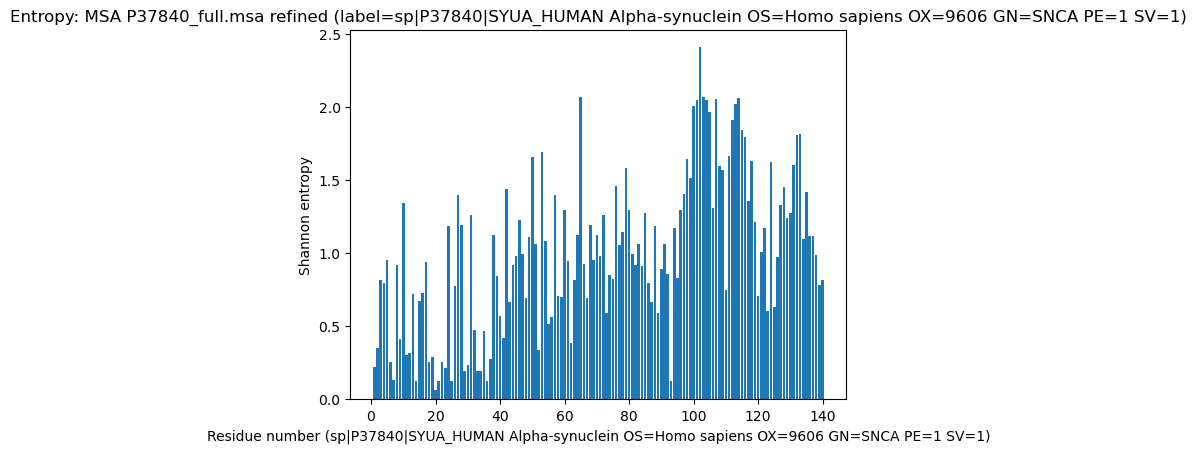

@> Label refinement reduced number of columns from 320 to 140 in 0.00s.


Region starts at 0 and spans 140


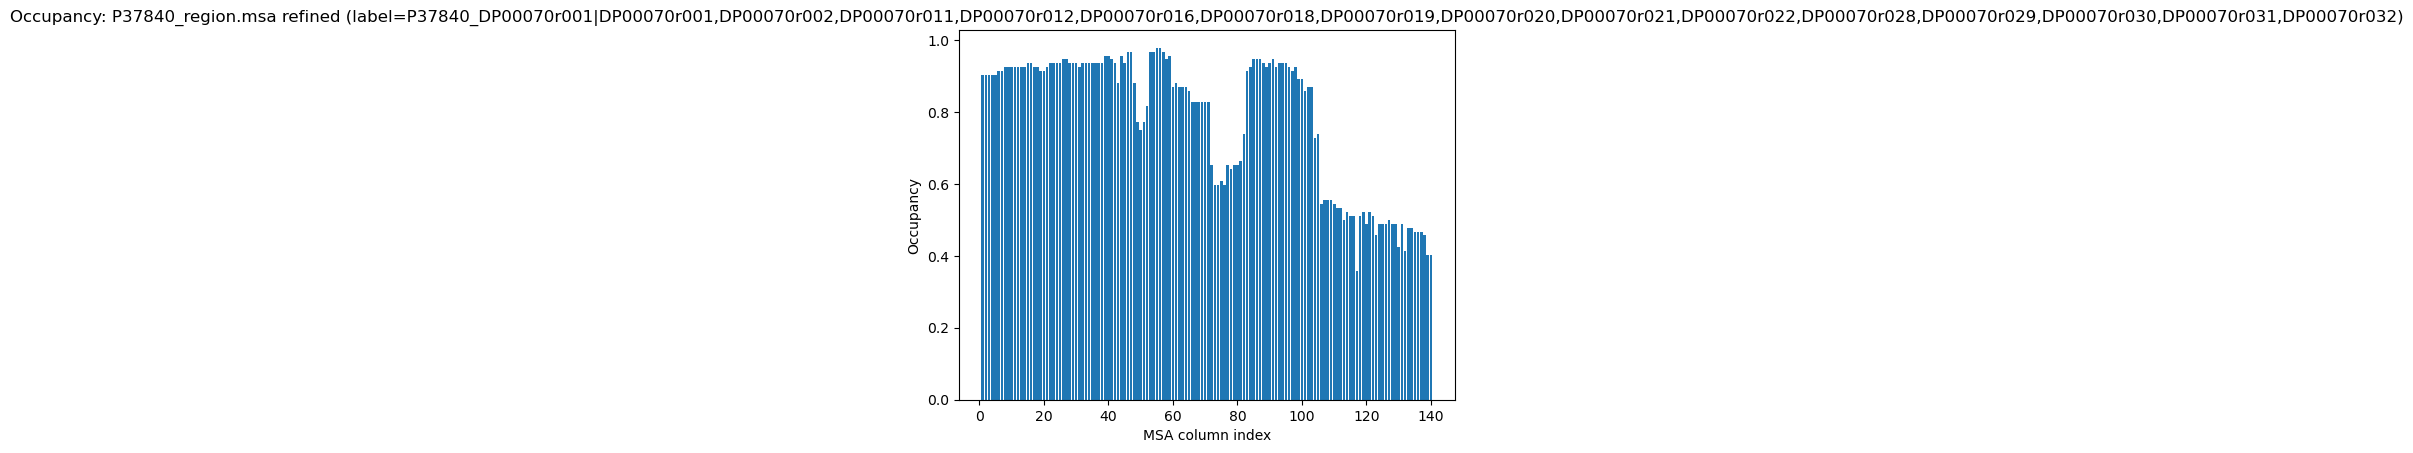

@> Cannot parse start and end values from sequence label P37840_DP00070r001|DP00070r001,DP00070r002,DP00070r011,DP00070r012,DP00070r016,DP00070r018,DP00070r019,DP00070r020,DP00070r021,DP00070r022,DP00070r028,DP00070r029,DP00070r030,DP00070r031,DP00070r032. Setting resnums 1 to 140
@> Cannot parse start and end values from sequence label tr|A0A212CLG3|A0A212CLG3_CEREH Alpha-synuclein OS=Cervus elaphus hippelaphus GN=Celaphus_00018621 PE=3 SV=1. Setting resnums 1 to 140
@> Cannot parse start and end values from sequence label tr|A0A1D5P8R1|A0A1D5P8R1_CHICK Alpha-synuclein OS=Gallus gallus GN=SNCA PE=3 SV=1. Setting resnums 1 to 140
@> Cannot parse start and end values from sequence label tr|K7FW98|K7FW98_PELSI Alpha-synuclein OS=Pelodiscus sinensis GN=SNCA PE=3 SV=1. Setting resnums 1 to 140
@> Cannot parse start and end values from sequence label tr|B5G015|B5G015_TAEGU Alpha-synuclein OS=Taeniopygia guttata PE=2 SV=1. Setting resnums 1 to 140
@> Cannot parse start and end values from se

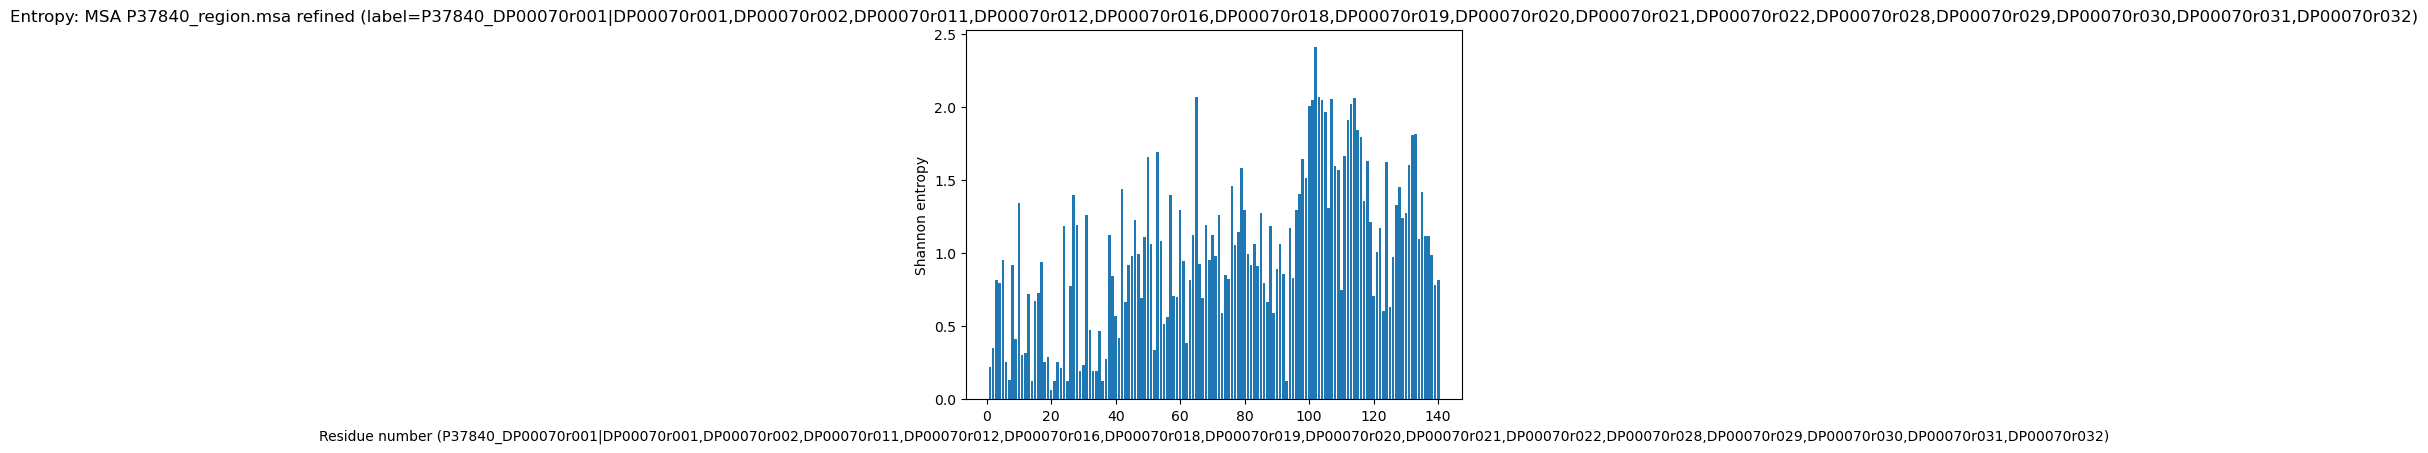

@> Label refinement reduced number of columns from 2165 to 393 in 0.00s.


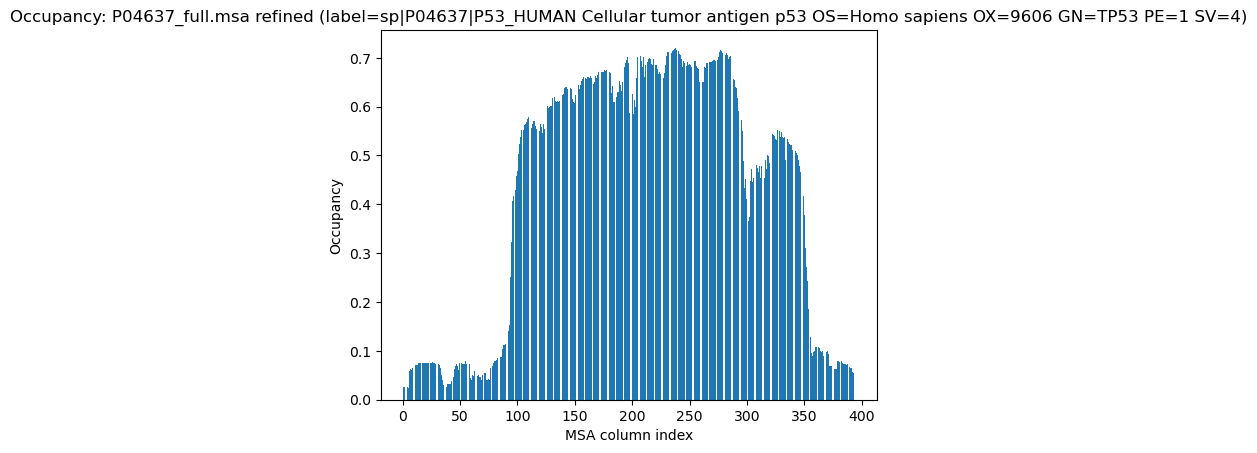

@> Cannot parse start and end values from sequence label sp|P04637|P53_HUMAN Cellular tumor antigen p53 OS=Homo sapiens OX=9606 GN=TP53 PE=1 SV=4. Setting resnums 1 to 393
@> Cannot parse start and end values from sequence label sp|P04637|P53_HUMAN Cellular tumor antigen p53 OS=Homo sapiens OX=9606 GN=TP53 PE=1 SV=4. Setting resnums 1 to 393


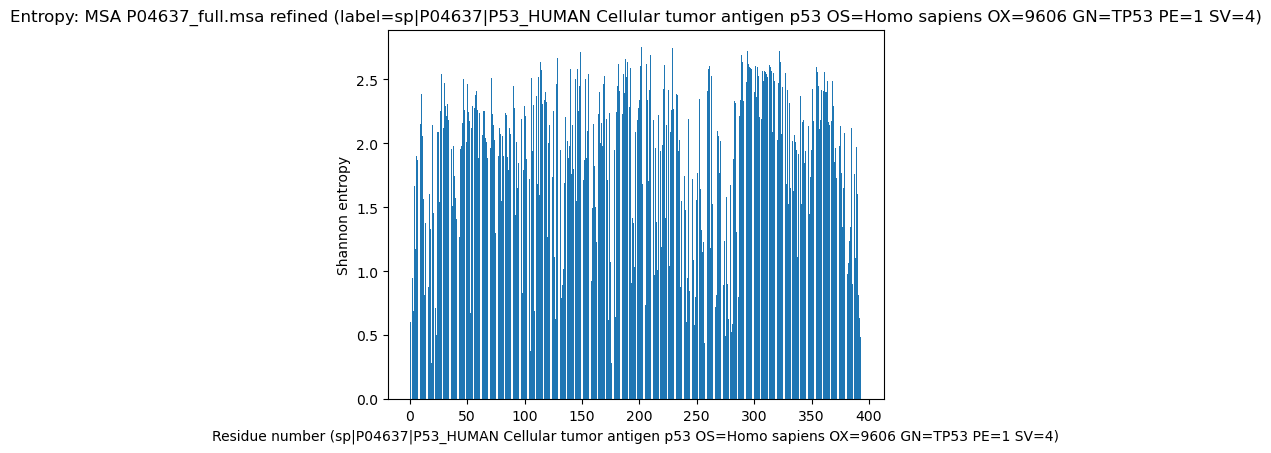

@> Label refinement reduced number of columns from 195 to 93 in 0.00s.


Region starts at 0 and spans 93


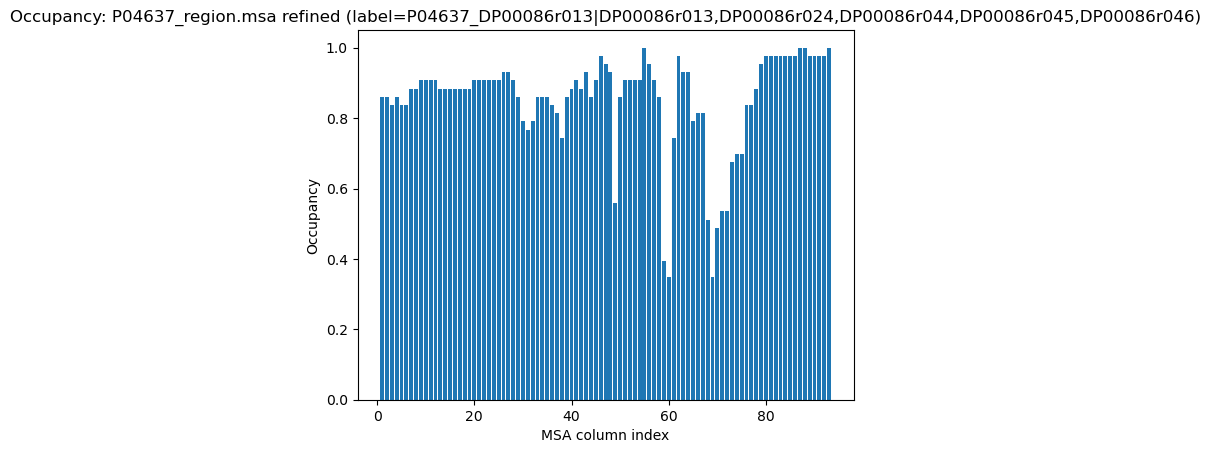

@> Cannot parse start and end values from sequence label P04637_DP00086r013|DP00086r013,DP00086r024,DP00086r044,DP00086r045,DP00086r046. Setting resnums 1 to 93
@> Cannot parse start and end values from sequence label P04637_DP00086r013|DP00086r013,DP00086r024,DP00086r044,DP00086r045,DP00086r046. Setting resnums 1 to 93


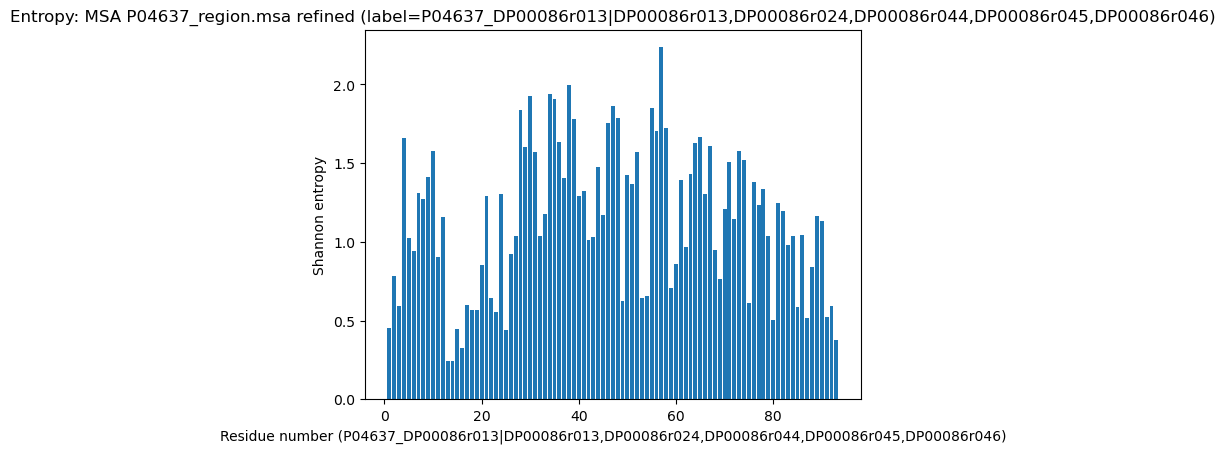

@> Label refinement reduced number of columns from 577 to 304 in 0.00s.


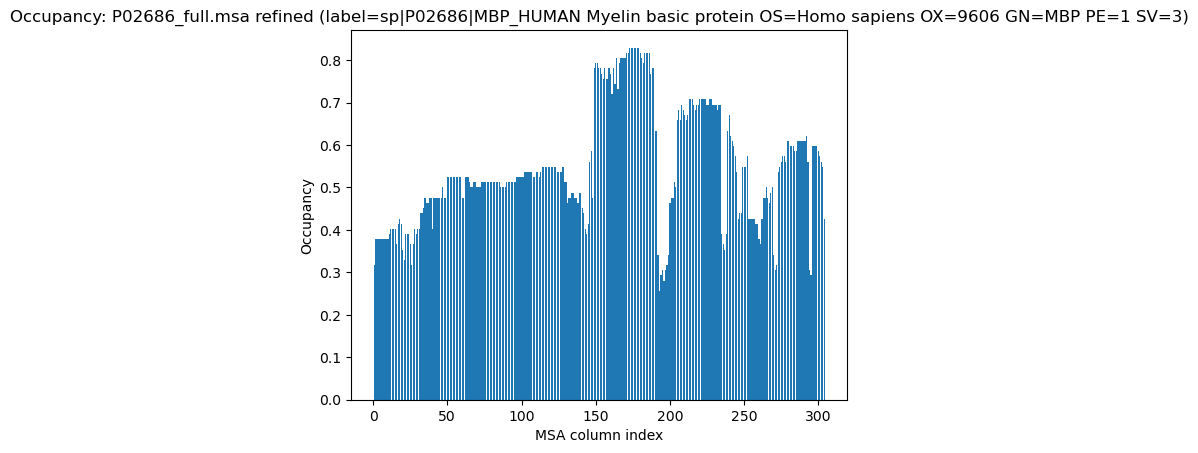

@> Cannot parse start and end values from sequence label sp|P02686|MBP_HUMAN Myelin basic protein OS=Homo sapiens OX=9606 GN=MBP PE=1 SV=3. Setting resnums 1 to 304
@> Cannot parse start and end values from sequence label tr|F7GF44|F7GF44_MONDO Uncharacterized protein OS=Monodelphis domestica GN=MBP PE=4 SV=1. Setting resnums 1 to 304
@> Cannot parse start and end values from sequence label tr|S7ML33|S7ML33_MYOBR Myelin basic protein OS=Myotis brandtii GN=D623_10034204 PE=4 SV=1. Setting resnums 1 to 304
@> Cannot parse start and end values from sequence label sp|P02686|MBP_HUMAN Myelin basic protein OS=Homo sapiens OX=9606 GN=MBP PE=1 SV=3. Setting resnums 1 to 304


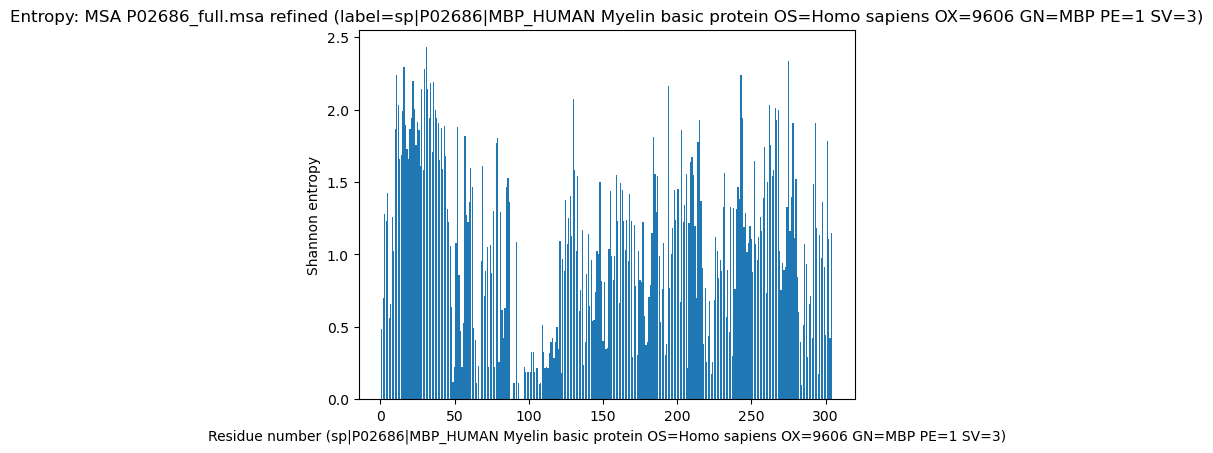

@> Label refinement reduced number of columns from 363 to 171 in 0.00s.


Region starts at 133 and spans 171


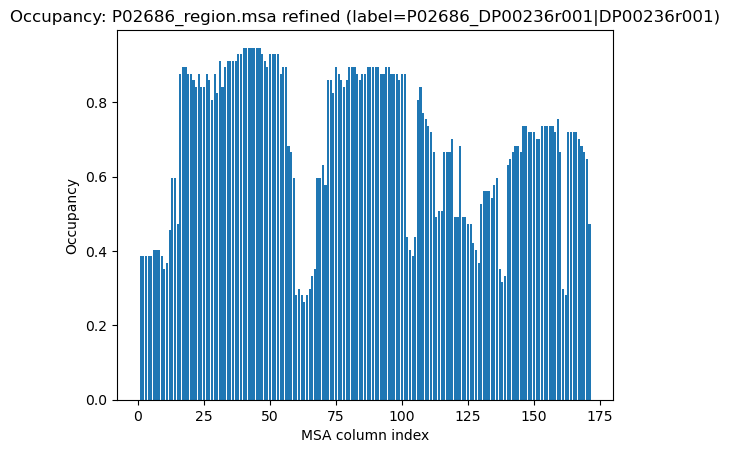

@> Cannot parse start and end values from sequence label P02686_DP00236r001|DP00236r001. Setting resnums 1 to 171
@> Cannot parse start and end values from sequence label tr|S7ML33|S7ML33_MYOBR Myelin basic protein OS=Myotis brandtii GN=D623_10034204 PE=4 SV=1. Setting resnums 1 to 171
@> Cannot parse start and end values from sequence label tr|F7GF44|F7GF44_MONDO Uncharacterized protein OS=Monodelphis domestica GN=MBP PE=4 SV=1. Setting resnums 1 to 171
@> Cannot parse start and end values from sequence label P02686_DP00236r001|DP00236r001. Setting resnums 1 to 171


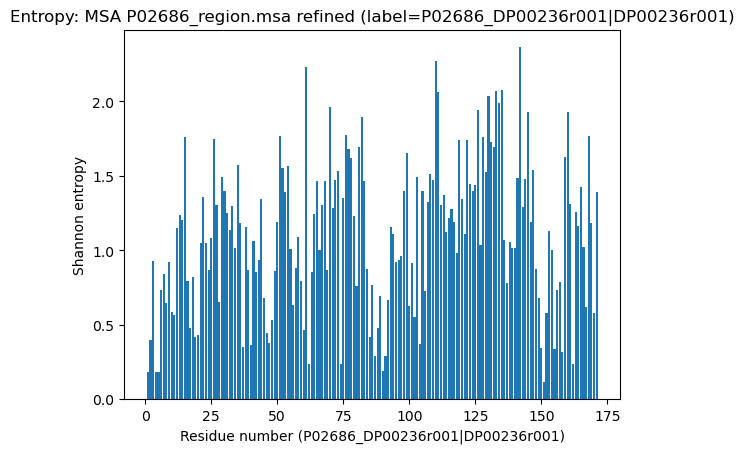

@> Label refinement reduced number of columns from 2750 to 194 in 0.00s.


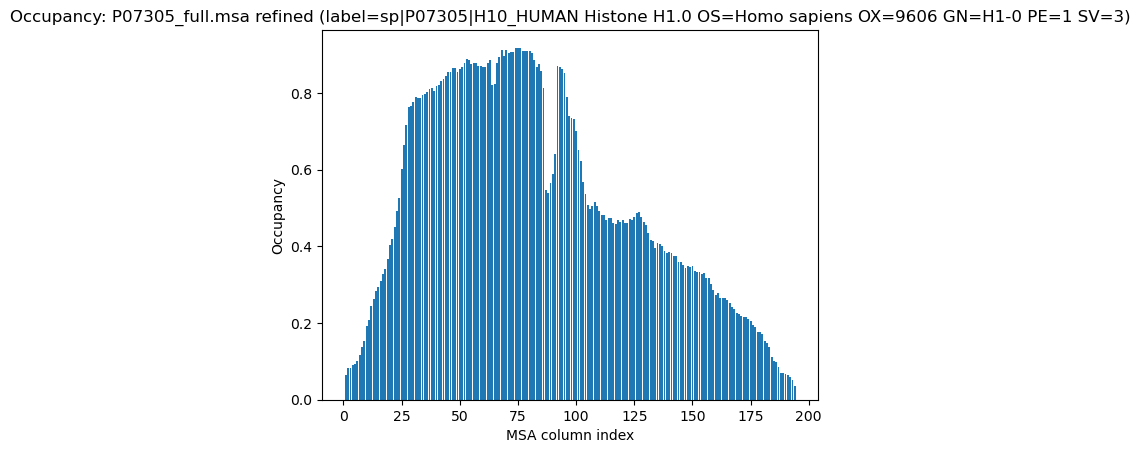

@> Cannot parse start and end values from sequence label sp|P07305|H10_HUMAN Histone H1.0 OS=Homo sapiens OX=9606 GN=H1-0 PE=1 SV=3. Setting resnums 1 to 194
@> Cannot parse start and end values from sequence label sp|P07305|H10_HUMAN Histone H1.0 OS=Homo sapiens OX=9606 GN=H1-0 PE=1 SV=3. Setting resnums 1 to 194


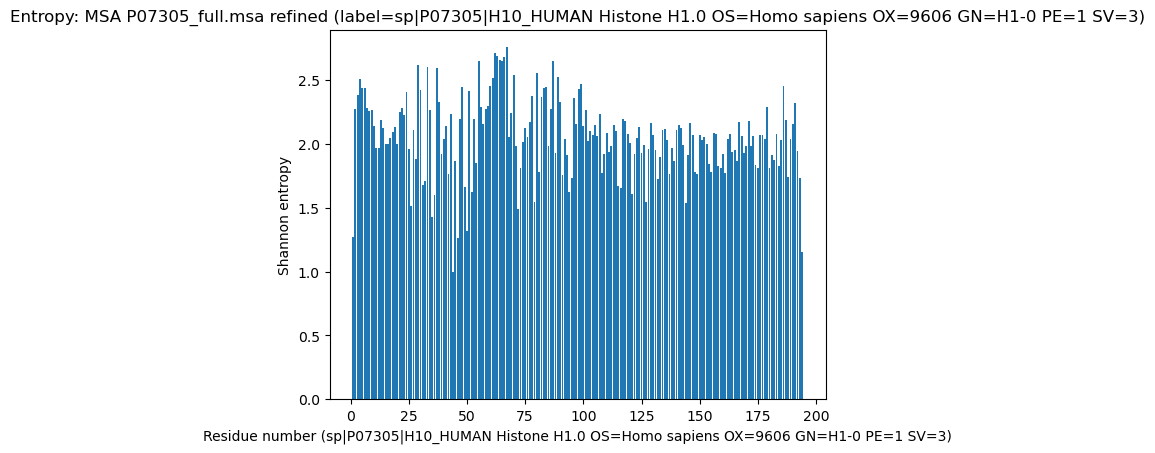

@> Label refinement reduced number of columns from 99 to 90 in 0.00s.


Region starts at 104 and spans 90


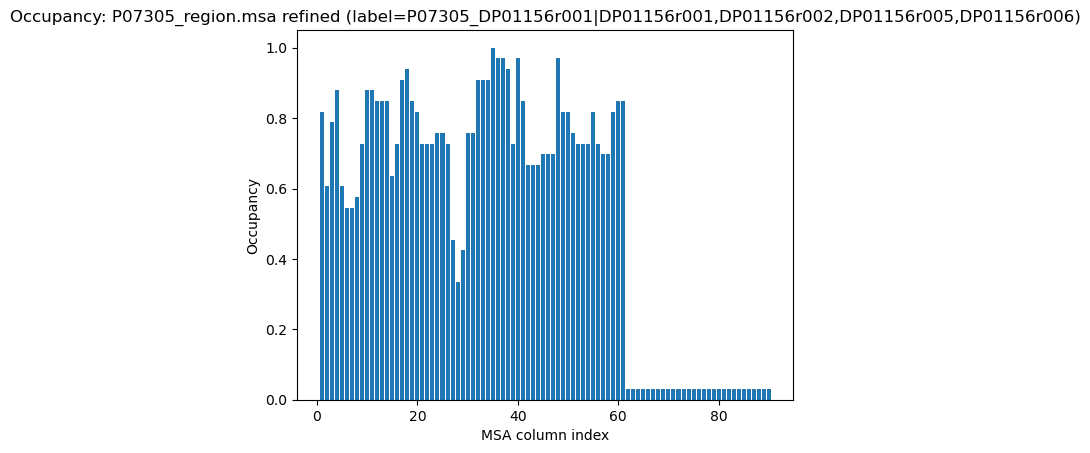

@> Cannot parse start and end values from sequence label P07305_DP01156r001|DP01156r001,DP01156r002,DP01156r005,DP01156r006. Setting resnums 1 to 90
@> Cannot parse start and end values from sequence label P07305_DP01156r001|DP01156r001,DP01156r002,DP01156r005,DP01156r006. Setting resnums 1 to 90


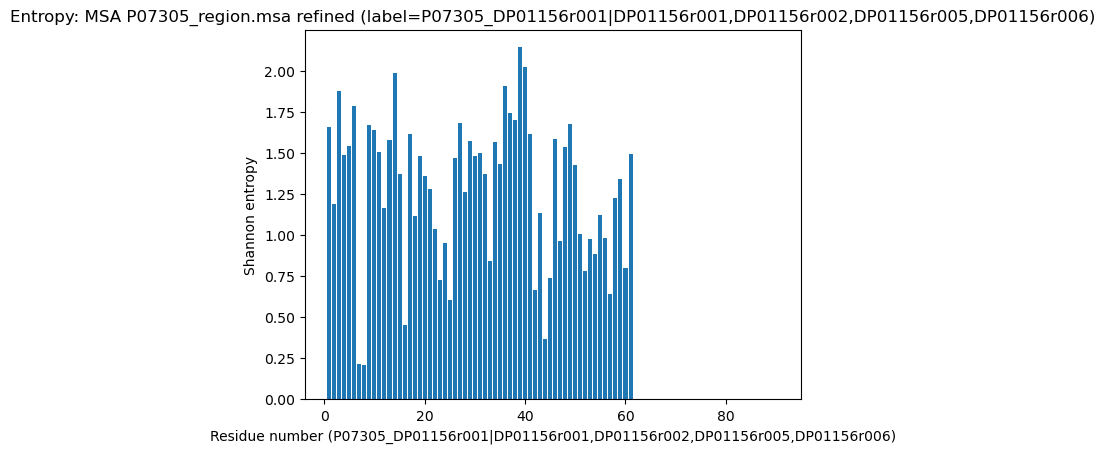

@> Label refinement reduced number of columns from 973 to 134 in 0.00s.


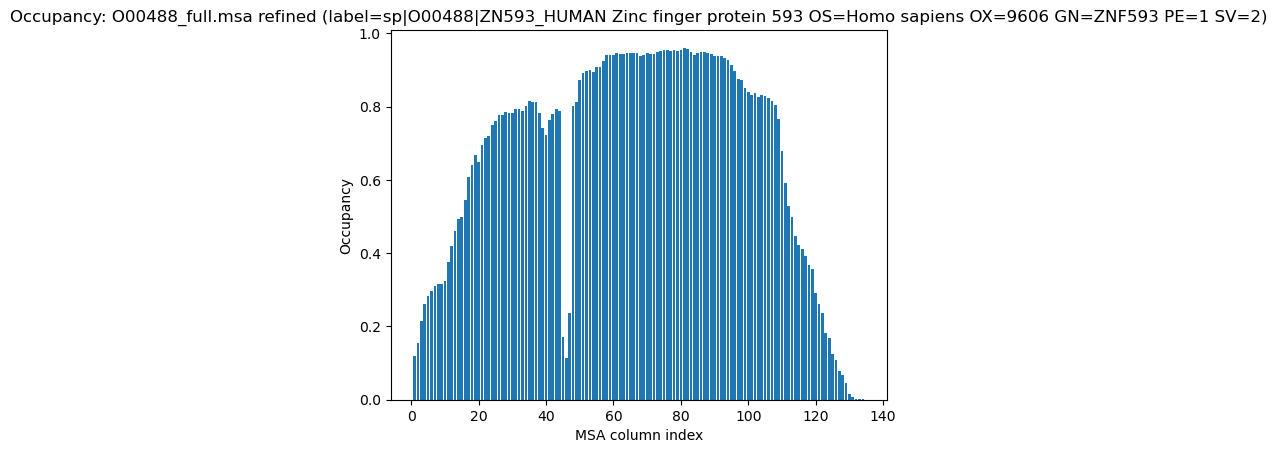

@> Cannot parse start and end values from sequence label sp|O00488|ZN593_HUMAN Zinc finger protein 593 OS=Homo sapiens OX=9606 GN=ZNF593 PE=1 SV=2. Setting resnums 1 to 134
@> Cannot parse start and end values from sequence label tr|L5MHE2|L5MHE2_MYODS Zinc finger protein 593 OS=Myotis davidii GN=MDA_GLEAN10008298 PE=4 SV=1. Setting resnums 1 to 134
@> Cannot parse start and end values from sequence label sp|O00488|ZN593_HUMAN Zinc finger protein 593 OS=Homo sapiens OX=9606 GN=ZNF593 PE=1 SV=2. Setting resnums 1 to 134


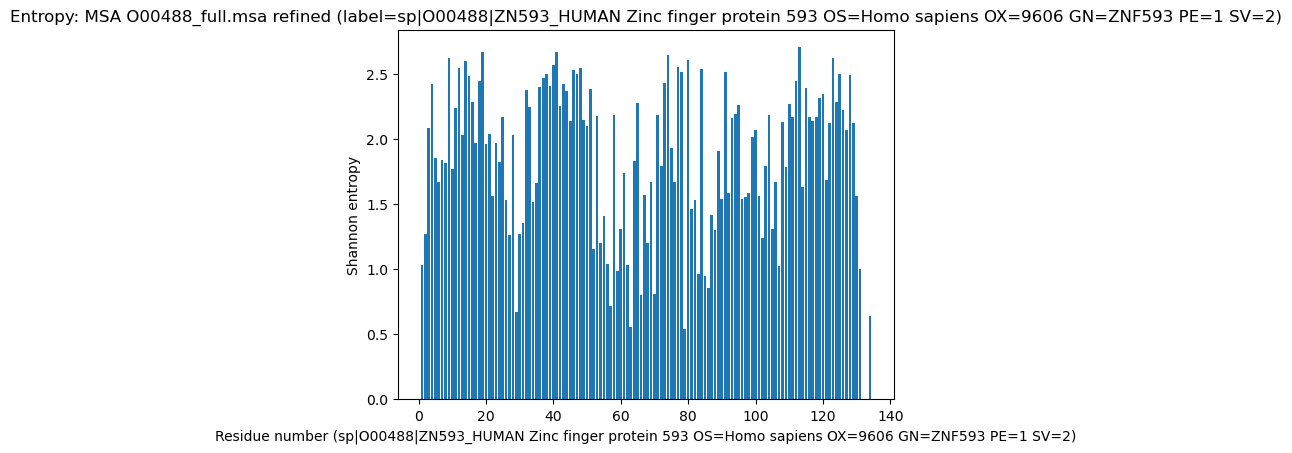

@> Label refinement reduced number of columns from 178 to 42 in 0.00s.


Region starts at 35 and spans 42


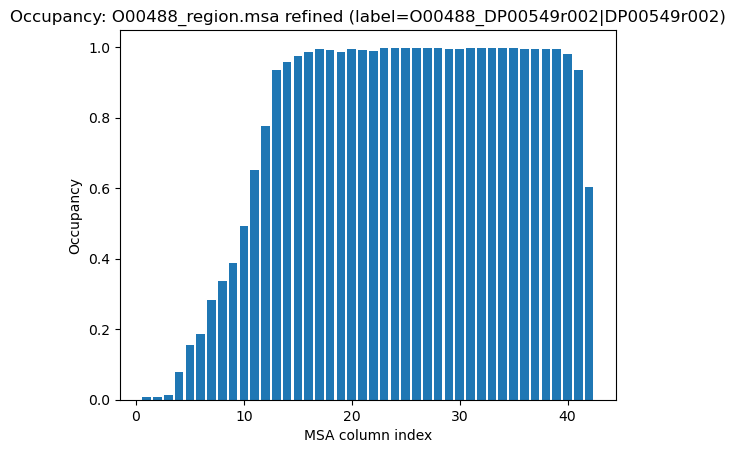

@> Cannot parse start and end values from sequence label O00488_DP00549r002|DP00549r002. Setting resnums 1 to 42
@> Cannot parse start and end values from sequence label tr|G5AUQ8|G5AUQ8_HETGA Zinc finger protein 593 OS=Heterocephalus glaber GN=GW7_08408 PE=4 SV=1. Setting resnums 1 to 42
@> Cannot parse start and end values from sequence label tr|L5MHE2|L5MHE2_MYODS Zinc finger protein 593 OS=Myotis davidii GN=MDA_GLEAN10008298 PE=4 SV=1. Setting resnums 1 to 42
@> Cannot parse start and end values from sequence label tr|H0XF49|H0XF49_OTOGA Uncharacterized protein OS=Otolemur garnettii GN=ZNF593 PE=4 SV=1. Setting resnums 1 to 42
@> Cannot parse start and end values from sequence label tr|A0A1A6GE21|A0A1A6GE21_NEOLE Uncharacterized protein OS=Neotoma lepida GN=A6R68_07832 PE=4 SV=1. Setting resnums 1 to 42
@> Cannot parse start and end values from sequence label tr|J9PB33|J9PB33_CANLF Zinc finger protein 593 OS=Canis lupus familiaris GN=ZNF593 PE=4 SV=1. Setting resnums 1 to 42
@> Can

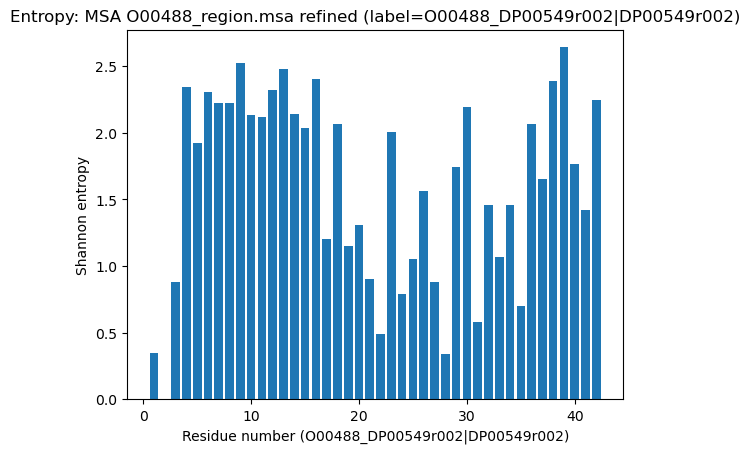

@> Label refinement reduced number of columns from 4074 to 513 in 0.00s.


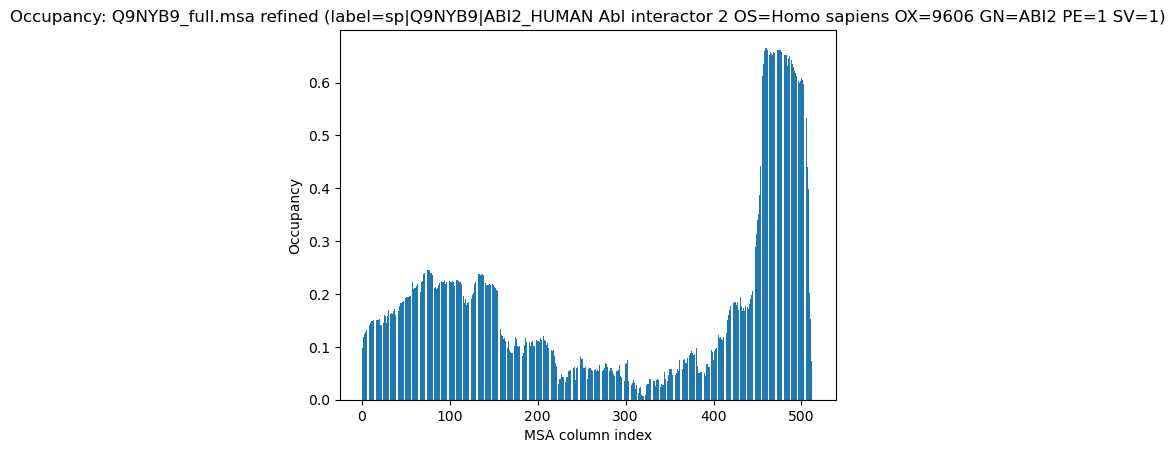

@> Cannot parse start and end values from sequence label sp|Q9NYB9|ABI2_HUMAN Abl interactor 2 OS=Homo sapiens OX=9606 GN=ABI2 PE=1 SV=1. Setting resnums 1 to 513
@> Cannot parse start and end values from sequence label sp|Q9NYB9|ABI2_HUMAN Abl interactor 2 OS=Homo sapiens OX=9606 GN=ABI2 PE=1 SV=1. Setting resnums 1 to 513


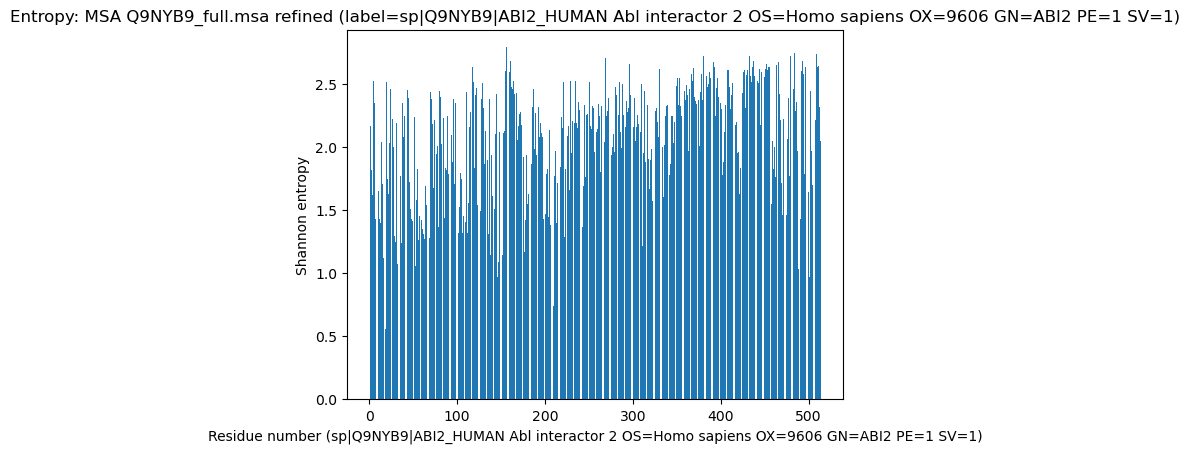

@> Label refinement reduced number of columns from 3035 to 358 in 0.00s.


Region starts at 155 and spans 358


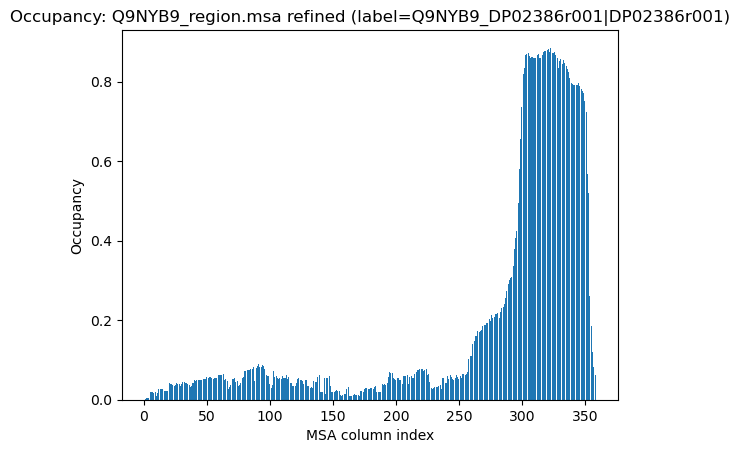

@> Cannot parse start and end values from sequence label Q9NYB9_DP02386r001|DP02386r001. Setting resnums 1 to 358
@> Cannot parse start and end values from sequence label Q9NYB9_DP02386r001|DP02386r001. Setting resnums 1 to 358


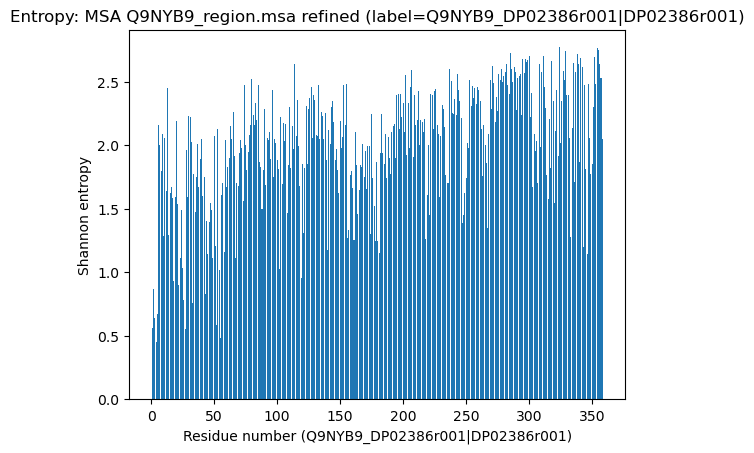

@> Label refinement reduced number of columns from 10490 to 933 in 0.01s.


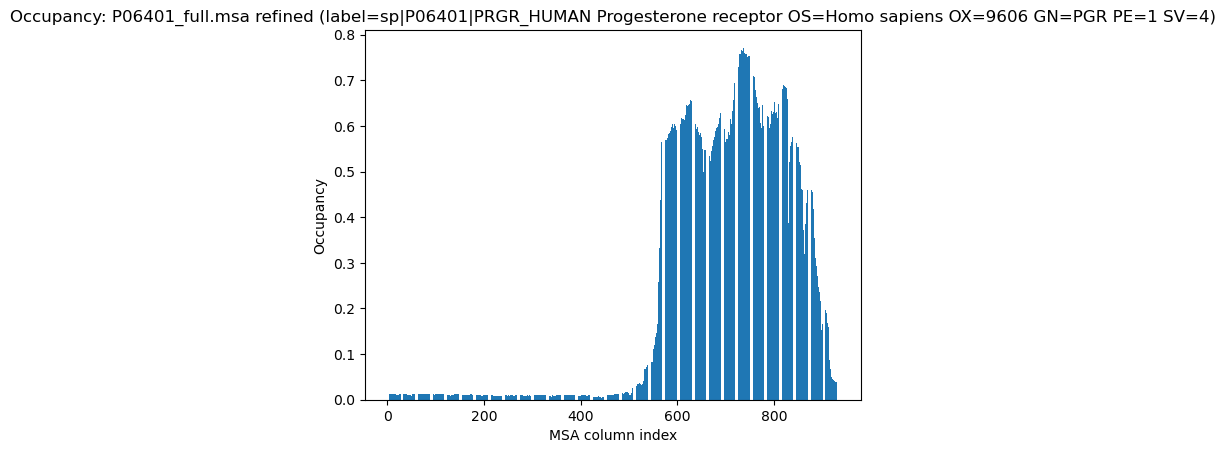

@> Cannot parse start and end values from sequence label sp|P06401|PRGR_HUMAN Progesterone receptor OS=Homo sapiens OX=9606 GN=PGR PE=1 SV=4. Setting resnums 1 to 933
@> Cannot parse start and end values from sequence label sp|P06401|PRGR_HUMAN Progesterone receptor OS=Homo sapiens OX=9606 GN=PGR PE=1 SV=4. Setting resnums 1 to 933


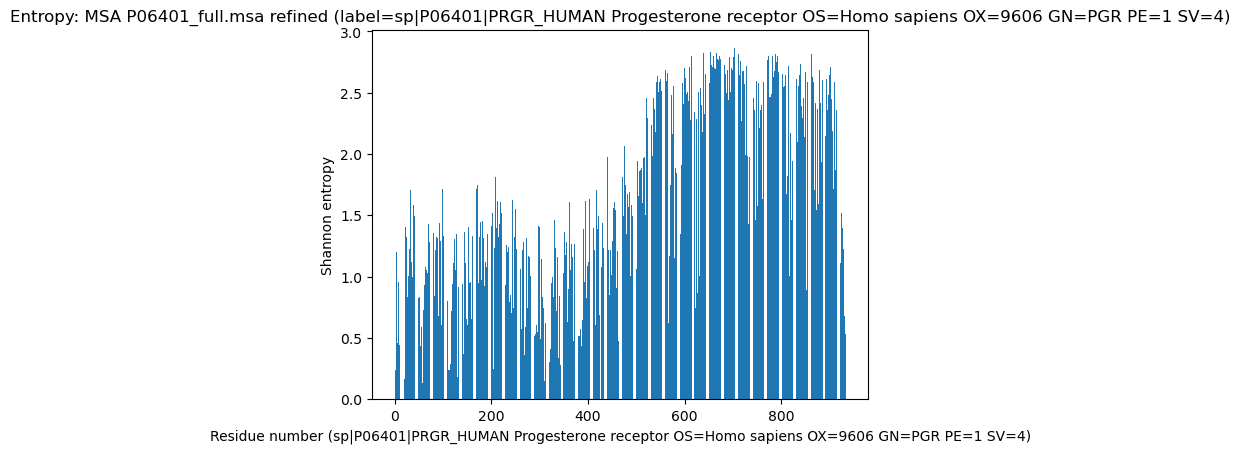

@> Label refinement reduced number of columns from 731 to 566 in 0.00s.


Region starts at 0 and spans 566


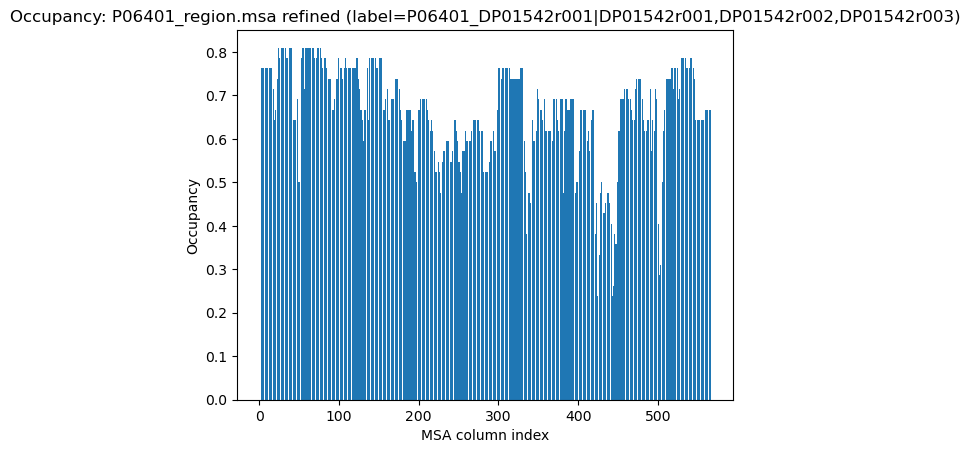

@> Cannot parse start and end values from sequence label P06401_DP01542r001|DP01542r001,DP01542r002,DP01542r003. Setting resnums 1 to 566
@> Cannot parse start and end values from sequence label P06401_DP01542r001|DP01542r001,DP01542r002,DP01542r003. Setting resnums 1 to 566


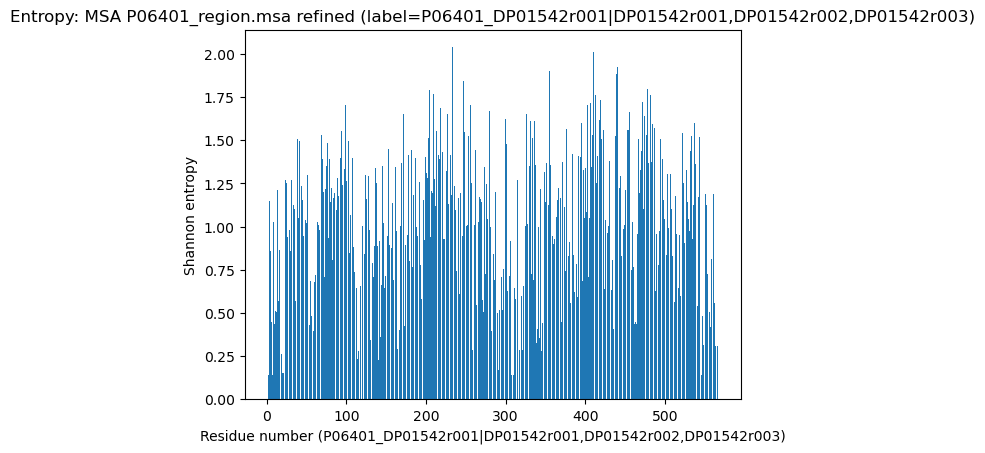

@> Label refinement reduced number of columns from 4708 to 407 in 0.00s.


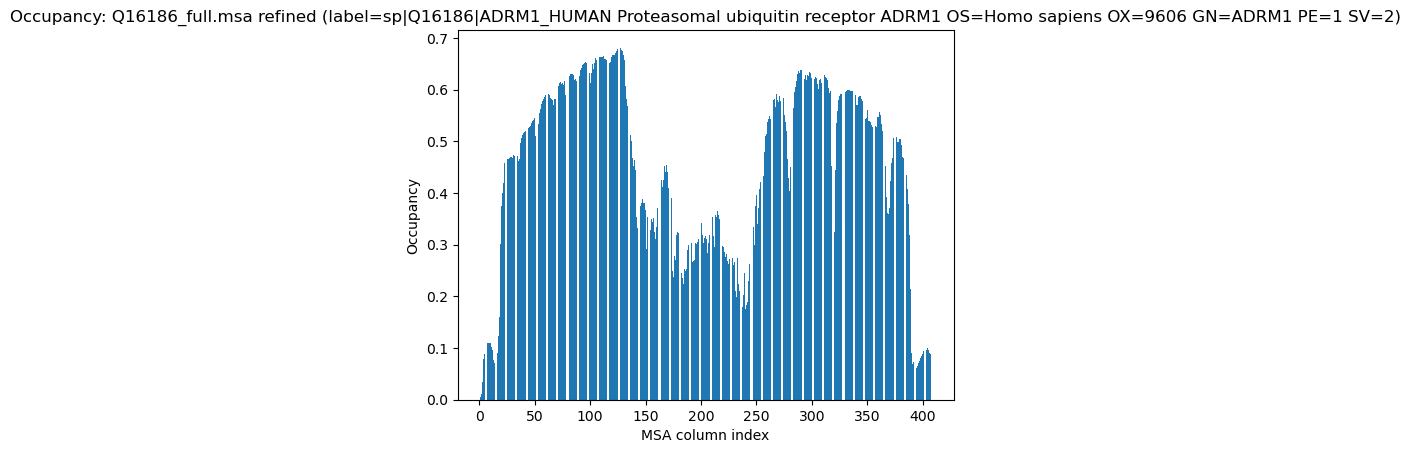

@> Cannot parse start and end values from sequence label sp|Q16186|ADRM1_HUMAN Proteasomal ubiquitin receptor ADRM1 OS=Homo sapiens OX=9606 GN=ADRM1 PE=1 SV=2. Setting resnums 1 to 407
@> Cannot parse start and end values from sequence label sp|Q16186|ADRM1_HUMAN Proteasomal ubiquitin receptor ADRM1 OS=Homo sapiens OX=9606 GN=ADRM1 PE=1 SV=2. Setting resnums 1 to 407


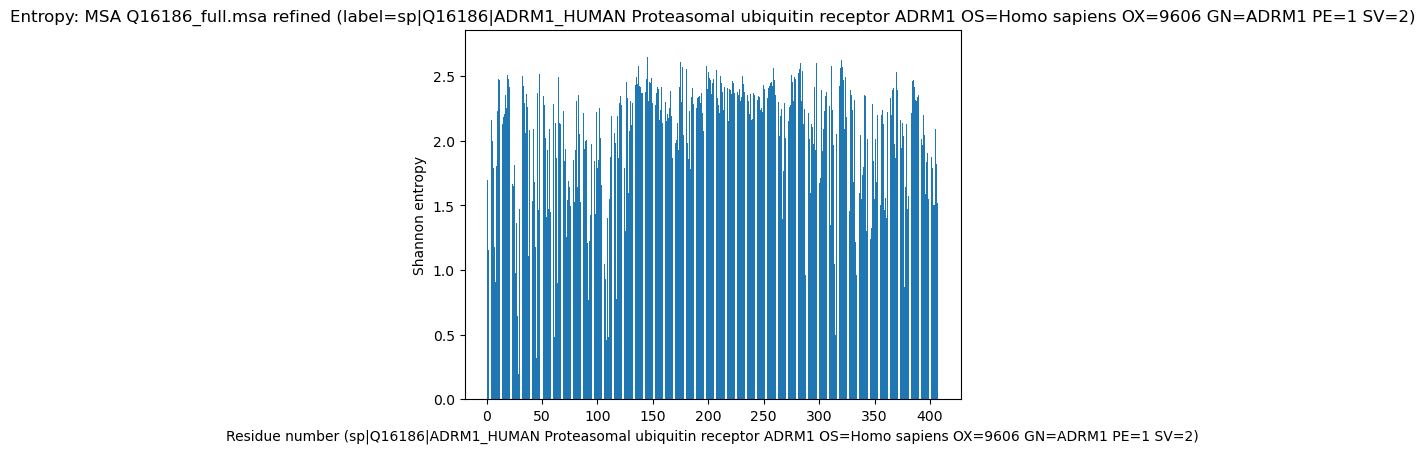

@> Label refinement reduced number of columns from 301 to 121 in 0.00s.


Region starts at 131 and spans 121


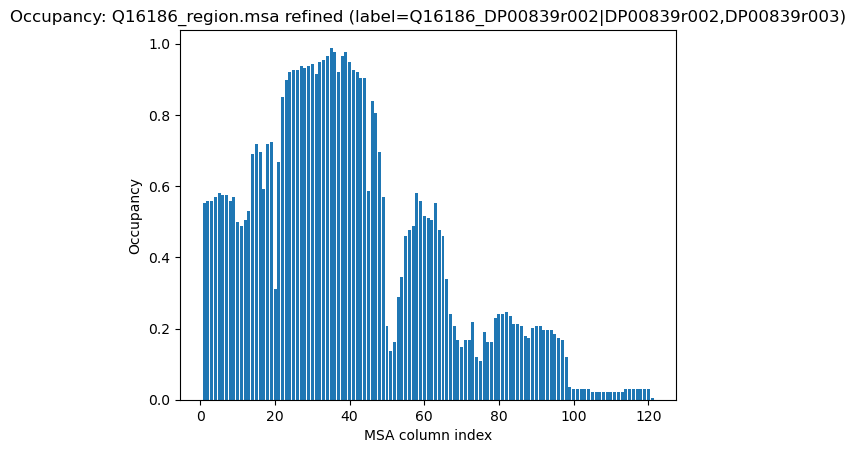

@> Cannot parse start and end values from sequence label Q16186_DP00839r002|DP00839r002,DP00839r003. Setting resnums 1 to 121
@> Cannot parse start and end values from sequence label Q16186_DP00839r002|DP00839r002,DP00839r003. Setting resnums 1 to 121


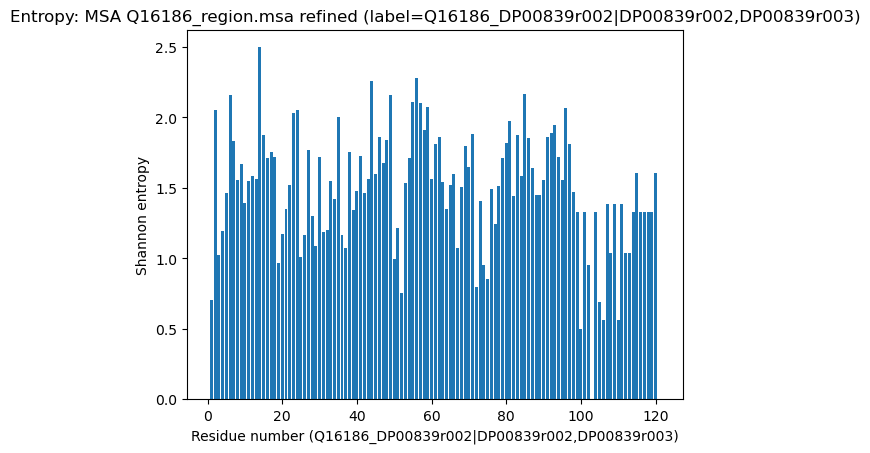

@> Label refinement reduced number of columns from 7827 to 466 in 0.00s.


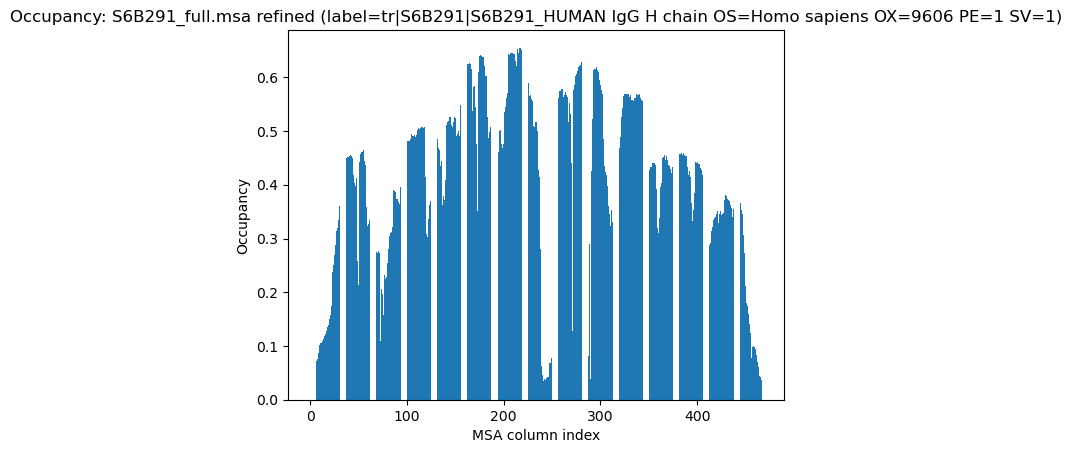

@> Cannot parse start and end values from sequence label tr|S6B291|S6B291_HUMAN IgG H chain OS=Homo sapiens OX=9606 PE=1 SV=1. Setting resnums 1 to 466
@> Cannot parse start and end values from sequence label tr|S6B291|S6B291_HUMAN IgG H chain OS=Homo sapiens OX=9606 PE=1 SV=1. Setting resnums 1 to 466


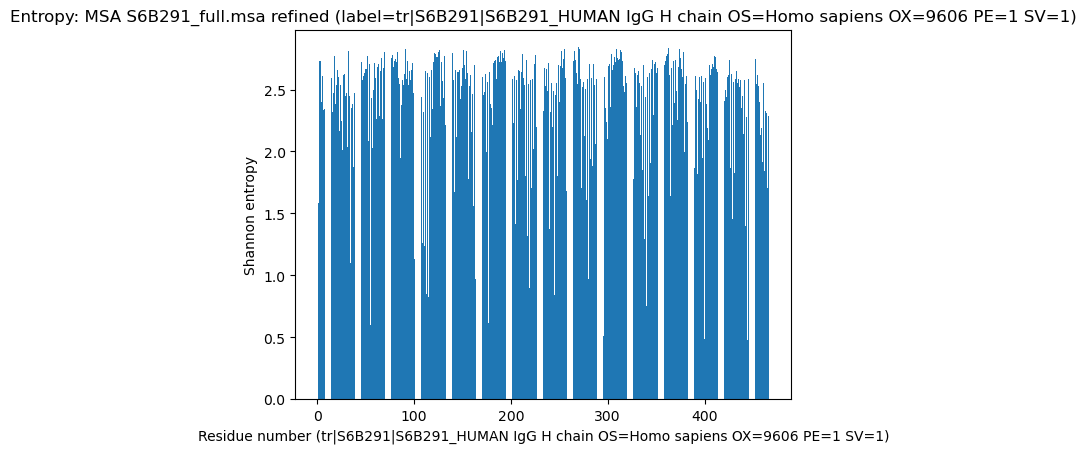

@> Label refinement reduced number of columns from 4252 to 226 in 0.00s.


Region starts at 239 and spans 226


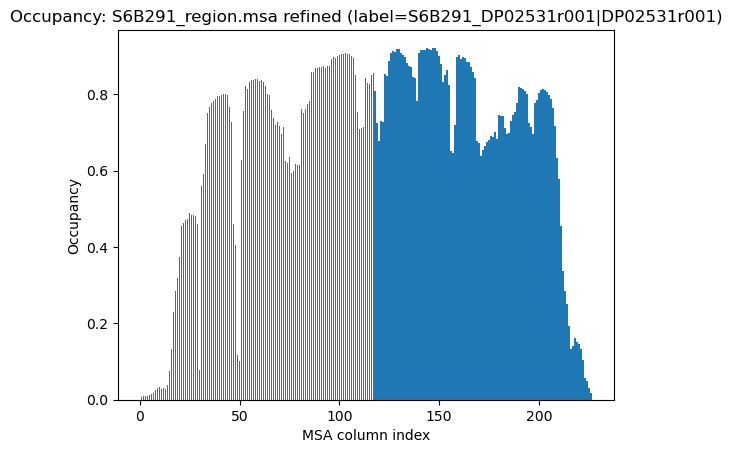

@> Cannot parse start and end values from sequence label S6B291_DP02531r001|DP02531r001. Setting resnums 1 to 226
@> Cannot parse start and end values from sequence label S6B291_DP02531r001|DP02531r001. Setting resnums 1 to 226


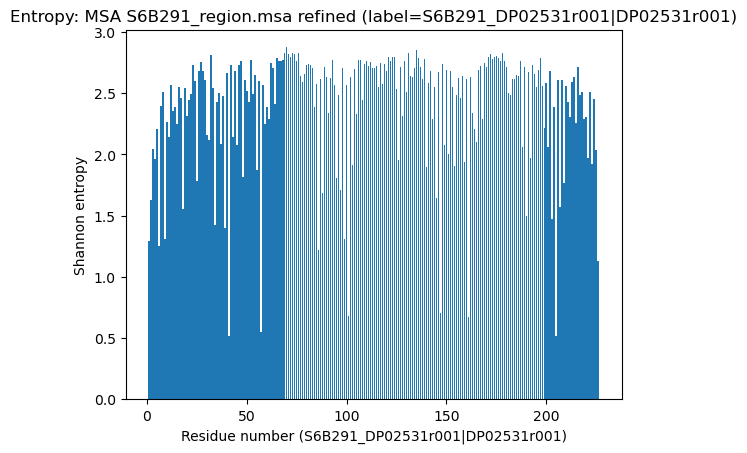

@> Label refinement reduced number of columns from 4225 to 372 in 0.00s.


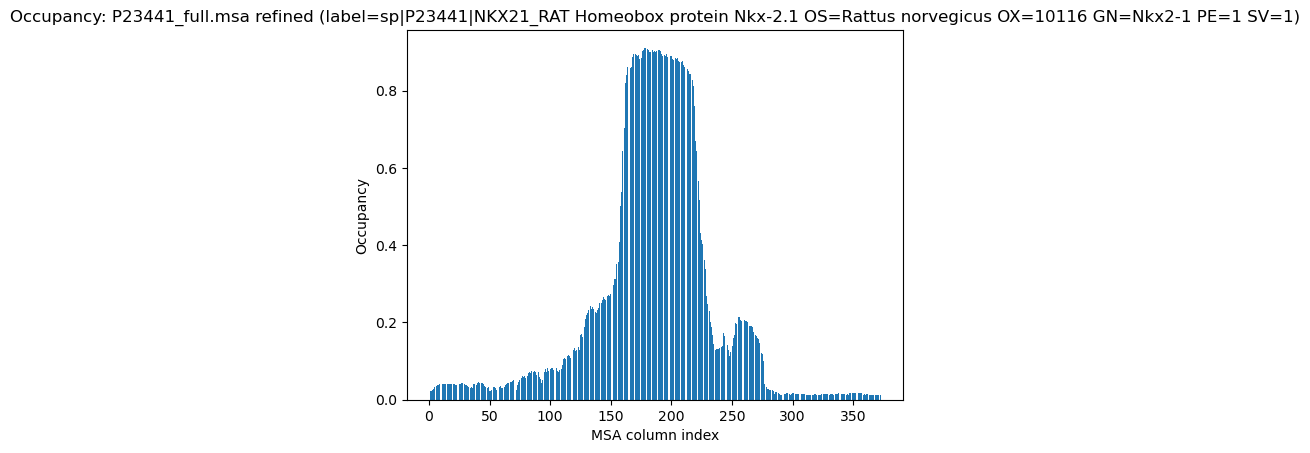

@> Cannot parse start and end values from sequence label sp|P23441|NKX21_RAT Homeobox protein Nkx-2.1 OS=Rattus norvegicus OX=10116 GN=Nkx2-1 PE=1 SV=1. Setting resnums 1 to 372
@> Cannot parse start and end values from sequence label sp|P23441|NKX21_RAT Homeobox protein Nkx-2.1 OS=Rattus norvegicus OX=10116 GN=Nkx2-1 PE=1 SV=1. Setting resnums 1 to 372


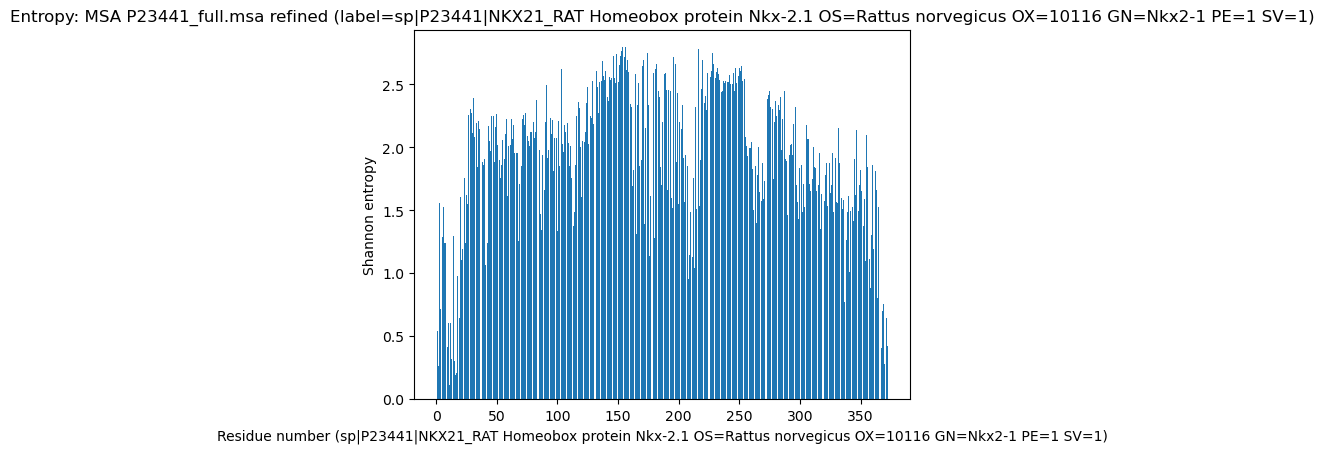

@> Label refinement reduced number of columns from 877 to 156 in 0.00s.


Region starts at 0 and spans 156


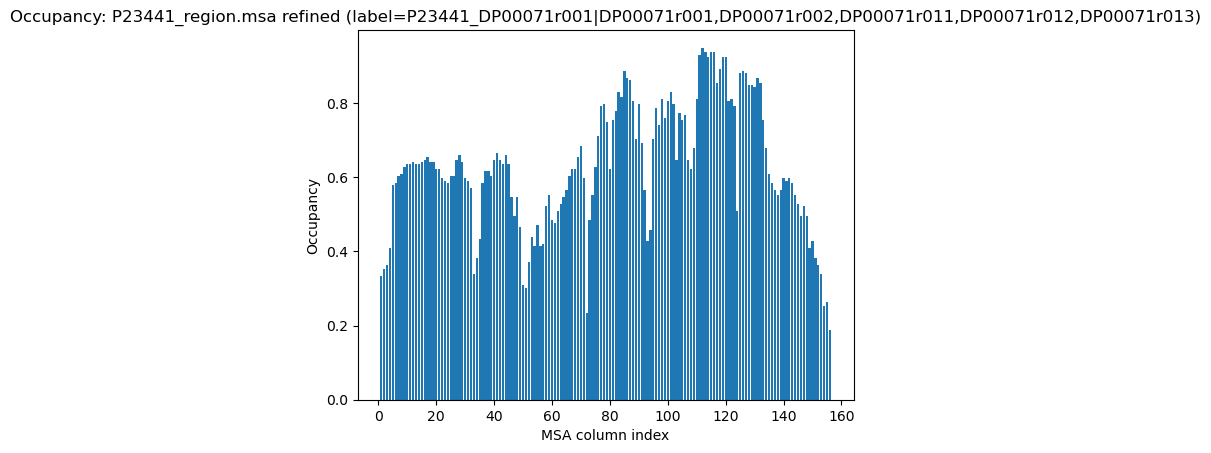

@> Cannot parse start and end values from sequence label P23441_DP00071r001|DP00071r001,DP00071r002,DP00071r011,DP00071r012,DP00071r013. Setting resnums 1 to 156
@> Cannot parse start and end values from sequence label P23441_DP00071r001|DP00071r001,DP00071r002,DP00071r011,DP00071r012,DP00071r013. Setting resnums 1 to 156


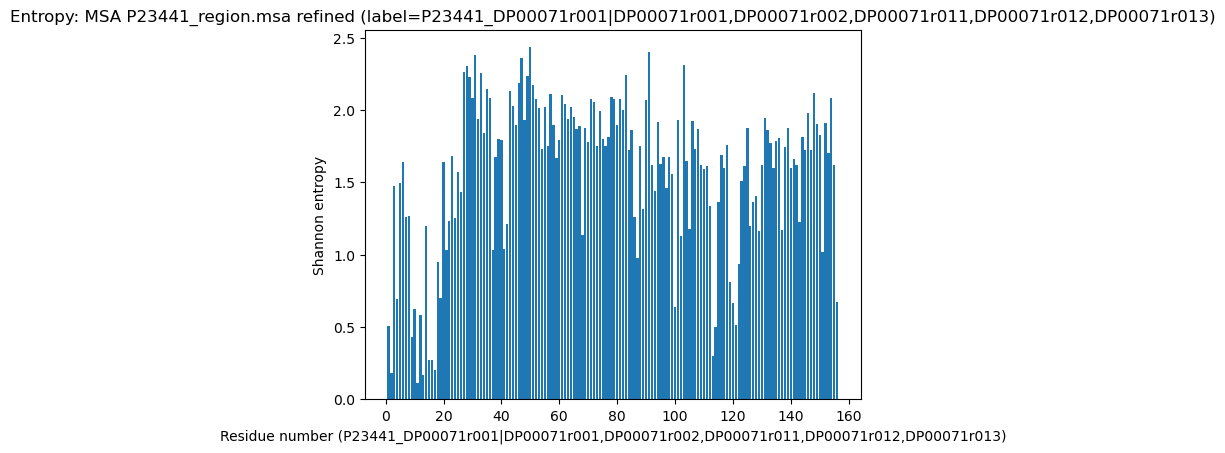

In [117]:
import re
import matplotlib.pyplot as plt
counter = 0
for i,l in enumerate(MSA_labels):
    msa_refined = refineMSA(MSAs[i], label=l)
    
    full_seq = msa_refined[0].__str__()
    
    showMSAOccupancy(msa_refined, occ='res')
    plt.show()
    
    showShannonEntropy(msa_refined)
    plt.show()
    
    msa_refined = refineMSA(MSAs_region[i], label=MSA_region_labels[i])
    region_seq = msa_refined[0].__str__()
    
    m = re.search(region_seq, full_seq)
    start = m.start()
    print(f"Region starts at {start} and spans {len(region_seq)}")
    
    showMSAOccupancy(msa_refined, occ='res')
    plt.show()
    
    showShannonEntropy(msa_refined)
    plt.show()
    
    counter += 1
    print("=========================================")
    
    